Dataset Preparation

In [2]:
# for fire dataset
import os
dataset_path = 'D-Fire'
print(os.listdir(dataset_path))


['test', 'train']


Data Preprocessing

D-Fire

In [3]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

images_path = os.path.join('D-Fire', 'train', 'images')
labels_path = os.path.join('D-Fire', 'train', 'labels')

image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(images_path, image_file)
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(labels_path, label_file)

    # Skip if label file is missing or empty
    if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
        print(f"Skipping {image_file}: label file missing or empty.")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"Skipping {image_file}: cannot read image.")
        continue

    image = cv2.resize(image, (224, 224))
    image = image / 255.0

    with open(label_path, 'r') as f:
        label = f.read().strip()

    # Augmentation setup
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    augmented_image = datagen.random_transform(image)
    print(f"Image: {image_file}, Label: {label}")

Skipping AoF00000.jpg: label file missing or empty.
Image: AoF00001.jpg, Label: 1 0.21622846781504987 0.7391304347826086 0.13689936536718042 0.1505016722408027
Image: AoF00002.jpg, Label: 0 0.7672493100275989 0.2889072847682119 0.03679852805887764 0.054635761589403975
Skipping AoF00003.jpg: label file missing or empty.
Skipping AoF00004.jpg: label file missing or empty.
Skipping AoF00005.jpg: label file missing or empty.
Skipping AoF00006.jpg: label file missing or empty.
Skipping AoF00007.jpg: label file missing or empty.
Skipping AoF00008.jpg: label file missing or empty.
Skipping AoF00009.jpg: label file missing or empty.
Skipping AoF00010.jpg: label file missing or empty.
Skipping AoF00011.jpg: label file missing or empty.
Skipping AoF00012.jpg: label file missing or empty.
Skipping AoF00013.jpg: label file missing or empty.
Skipping AoF00014.jpg: label file missing or empty.
Skipping AoF00015.jpg: label file missing or empty.
Skipping AoF00016.jpg: label file missing or empty.
Ski

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import numpy as np

images_path = os.path.join('D-Fire', 'train', 'images')
labels_path = os.path.join('D-Fire', 'train', 'labels')

image_files = [f for f in os.listdir(images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

X = []
labels = []

for image_file in image_files:
    image_path = os.path.join(images_path, image_file)
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(labels_path, label_file)

    # Skip if label file is missing or empty
    if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
        continue

    image = cv2.imread(image_path)
    if image is None:
        continue

    image = cv2.resize(image, (224, 224))
    image = image / 255.0

    with open(label_path, 'r') as f:
        label = f.read().strip()

    X.append(image)
    labels.append(label)

X = np.array(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Number of classes
num_classes = y_categorical.shape[1]

# Load ResNet50 base model (pre-trained on ImageNet), exclude top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom classification head
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9380)           │    19,219,620 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,807,332 (163.30 MB)

 Trainable params: 19,219,620 (73.32 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
print(labels[:10])
print(f"Number of unique labels: {len(set(labels))}")

['1 0.21622846781504987 0.7391304347826086 0.13689936536718042 0.1505016722408027', '0 0.7672493100275989 0.2889072847682119 0.03679852805887764 0.054635761589403975', '0 0.946875 0.18958333333333335 0.060937500000000006 0.09305555555555556', '0 0.946875 0.18680555555555556 0.0578125 0.09583333333333334', '0 0.5144531250000001 0.3527777777777778 0.89765625 0.525', '1 0.42734375 0.04791666666666667 0.353125 0.09583333333333334', '0 0.33632812500000003 0.4048611111111111 0.02421875 0.034722222222222224', '0 0.32851562500000003 0.39861111111111114 0.03515625 0.04166666666666667', '0 0.32851562500000003 0.39861111111111114 0.03828125 0.04722222222222222', '0 0.319921875 0.3965277777777778 0.041406250000000006 0.043055555555555555']
Number of unique labels: 9380


In [ ]:
X = []
labels = []

for image_file in image_files:
    image_path = os.path.join(images_path, image_file)
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(labels_path, label_file)

    if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
        continue

    image = cv2.imread(image_path)
    if image is None:
        continue

    image = cv2.resize(image, (224, 224))
    image = image / 255.0

    # Read all lines in the label file and extract class IDs
    with open(label_path, 'r') as f:
        lines = f.readlines()
        class_ids = [line.strip().split()[0] for line in lines if line.strip()]

    # Use the first class_id as the label (or decide your own logic)
    # If you want to mark as "fire" if any class_id == 1, you can do:
    if '1' in class_ids:
        label = 'fire'
    else:
        label = 'no_fire'

    X.append(image)
    labels.append(label)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(labels)           # Converts 'fire'/'no_fire' to 0/1
y_categorical = to_categorical(y_encoded)      # Converts to one-hot encoding

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
print(f"Number of images: {len(X)}")
print(f"Number of labels: {len(labels)}")

Number of images: 9388
Number of labels: 9388


In [ ]:
X = np.array(X)
labels = np.array(labels)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(7510, 224, 224, 3) (7510, 2)
(1878, 224, 224, 3) (1878, 2)


In [ ]:
# Model definition
num_classes = y_categorical.shape[1]  # Should be 2 for 'fire'/'no_fire'

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Training
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.5326 - loss: 0.7332 - val_accuracy: 0.6906 - val_loss: 0.6336
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.6300 - loss: 0.6475 - val_accuracy: 0.7753 - val_loss: 0.5979
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.6756 - loss: 0.6096 - val_accuracy: 0.6294 - val_loss: 0.6042
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.6909 - loss: 0.5947 - val_accuracy: 0.7833 - val_loss: 0.5589
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.6920 - loss: 0.5869 - val_accuracy: 0.7710 - val_loss: 0.5454
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.7051 - loss: 0.5734 - val_accuracy: 0.7875 - val_loss: 0.5383
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.7146 - loss: 0.5615 - val_accuracy: 0.7162 - val_loss: 0.5395
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.7231 - loss: 0.5542 - val_accu

In [ ]:
import os
import cv2
import numpy as np

# Test data paths
test_images_path = os.path.join('D-Fire', 'test', 'images')
test_labels_path = os.path.join('D-Fire', 'test', 'labels')

test_image_files = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

X_test = []
test_labels = []

for image_file in test_image_files:
    image_path = os.path.join(test_images_path, image_file)
    label_file = os.path.splitext(image_file)[0] + '.txt'
    label_path = os.path.join(test_labels_path, label_file)

    if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
        continue

    image = cv2.imread(image_path)
    if image is None:
        continue

    image = cv2.resize(image, (224, 224))
    image = image / 255.0

    with open(label_path, 'r') as f:
        lines = f.readlines()
        class_ids = [line.strip().split()[0] for line in lines if line.strip()]

    if '1' in class_ids:
        label = 'fire'
    else:
        label = 'no_fire'

    X_test.append(image)
    test_labels.append(label)

X_test = np.array(X_test)
test_labels = np.array(test_labels)

# Encode test labels
y_test_encoded = le.transform(test_labels)
y_test_categorical = to_categorical(y_test_encoded)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

72/72 - 83s - 1s/step - accuracy: 0.7718 - loss: 0.5162
Test Loss: 0.5162
Test Accuracy: 0.7718


In [ ]:
# Save the trained model
model.save('fire_detection_resnet50_V1.h5')
print("Model saved as fire_detection_resnet50.h5")

Model saved as fire_detection_resnet50.h5


Matplotlib is building the font cache; this may take a moment.


NameError: name 'history' is not defined

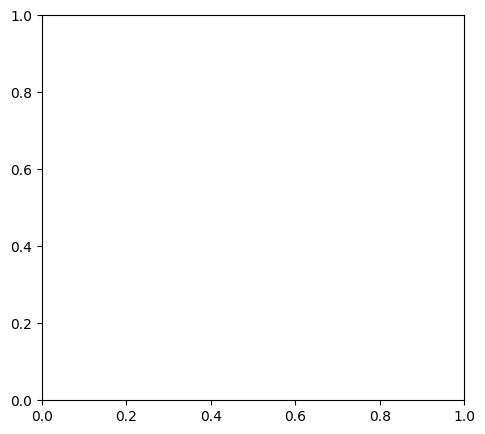

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize some predictions on test set
preds = model.predict(X_test)
pred_labels = le.inverse_transform(np.argmax(preds, axis=1))

plt.figure(figsize=(12, 8))
for i in range(8):
    idx = np.random.randint(0, len(X_test))
    plt.subplot(2, 4, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {test_labels[idx]}\nPred: {pred_labels[idx]}")